In [113]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import vincenty

# Network Model of Lines of Interest

Nodes are stations (position is lat/long of each station), edges are tracks between stations (weight is track length)

In [114]:
df = pd.read_csv('../../nanjing-data/Station_lat_lng.csv', encoding='gb2312')
df.head()

,STATIONID,STATIONCNNAME,STATIONENABBRNAME,STATIONTYPE,VIRTUALFLAG,ENABLEFLAG,ROWFLAG,CREATIONTIME,STATIONCNABBRNAME,lng,lat,lng_lat
0,1,奥体中心,OLYMPIC STADIUM,0,0,1,1,41834.41839,AT,118.724648,32.014641,"118.724648,32.014641"
1,2,元通,YUANTONG,1,0,1,1,41834.42017,YT,118.728019,32.001636,"118.728019,32.001636"
2,3,中胜,ZHONGSHENG,0,0,1,1,41834.42063,ZS,118.740078,31.993863,"118.740078,31.993863"
3,4,小行,XIAOHANG,0,0,1,1,41834.42095,XH,118.750965,31.988061,"118.750965,31.988061"
4,5,安德门,ANDEMEN,1,0,1,1,41737.57271,ADM,118.768408,31.997111,"118.768408,31.997111"


In [115]:
# allow conversion back and forth between station id and station english names

nid = df['STATIONID']
nid.index = df['STATIONENABBRNAME']
nid = nid.to_dict()

idn = df['STATIONENABBRNAME']
idn.index = df['STATIONID']
idn = idn.to_dict()

# stations to consider
line1 = ['Maigaoqiao','Hongshan Zoo','Nanjing Railway Station','Xinmofanmalu','Xuanwumen','Gulou','Zhujianglu','Xinjiekou','Zhangfuyuan','Sanshanjie','Zhonghuamen','Andemen','Tianlongsi','Ruanjiandadao','Huashenmiao','Nanjing South Railway Station','Shuanglongdadao','Hedingqiao','Shengtailu','Baijiahu','Xiaolongwan','Zhushanlu','Tianyindadao','Longmiandadao','NMU JIETT','NJCI','CPU']
line1 = [str.upper(st) for st in line1]
line1lengths = [1.13,1.18,1.72,1.07,1.24,0.84,1.17,1.07,0.92,1.92,2.10,1.37,1.21,1.03,1.82,2.16,1.40,0.89,1.31,1.46,1.15,1.92,1.31,1.54,2.72,1.97]
# line has early terminus before Shengtailu

line2 = ['Youfangqiao','Yurundajie','Yuantong','Olympic Stadium East','Xinglongdajie','Jiqingmendajie','Yunjinlu','Mochouhu','Hanzhongmen','Shanghailu','Xinjiekou','Daxinggong','Xi\'anmen','Minggugong','Muxuyuan','Xiamafang','Xiaolingwei','Zhonglingjie','Maqun','Jinmalu','Xianhemen','Xuezelu','Xianlinzhongxin','Yangshangongyuan','NJU Xianlin Campus','Jingtianlu']
line2 = [str.upper(st) for st in line2]
line2lengths = [2.55,1.64,1.27,1.36,1.49,1.22,1.31,0.95,0.86,0.76,1.01,1.03,1.33,1.48,1.35,0.89,1.19,2.77,2.99,1.68,1.33,1.53,1.07,1.94,1.85]

line3 = ['Linchang','Xinghuolu','SEU Chengxian College','Taifenglu','Tianruncheng','Liuzhoudonglu','Shangyuanmen','Wutangguangchang','Xiaoshi','Nanjing Railway Station','NFU Xinzhuang','Jimingsi','Fuqiao','Daxinggong','Changfujie','Fuzimiao','Wudingmen','Yuhuamen','Kazimen','Daminglu','Mingfaguangchang','Nanjing South Railway Station','Hongyundadao','Shengtaixilu','Tianyuanxilu','Jiulonghu','Chengxindadao','SEU Jiulonghu Campus','Mozhoudonglu']
line3 = [str.upper(st) for st in line3]
line3lengths = [2.52,1.07,0.92,1.64,1.85,3.53,0.92,1.91,1.46,1.84,2.88,0.84,0.84,0.92,1.19,1.20,1.19,0.93,1.09,1.19,1.03,1.24,1.75,1.80,2.45,1.48,1.34,2.82]
# line has early terminus before Tianyuanxilu

line10 = ['Andemen','Xiaohang','Zhongsheng','Yuantong','Olympic Stadium','Mengdudajie','Lvboyuan','Jiangxinzhou','Linjiang','Pukouwanhuicheng','Nanjing Tech','Longhualu','Wendelu','Yushanlu']
line10 = [str.upper(st) for st in line10]
line10lengths = [1.96,1.31,1.39,1.90,0.83,1.29,1.65,4.51,1.15,0.82,1.44,1.12,1.87]

# all lines
stations = set(line1 + line2 + line3 + line10)

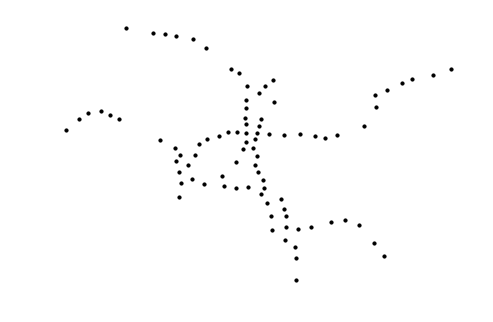

In [116]:
# build network model

G = nx.Graph()

for i, row in df.iterrows():
    if row['STATIONENABBRNAME'] in stations:
        G.add_node(row['STATIONID'], pos=(row['lng'], row['lat']))
nx.draw(G, pos=nx.get_node_attributes(G,'pos'), node_size=10, node_color='k')
plt.show()

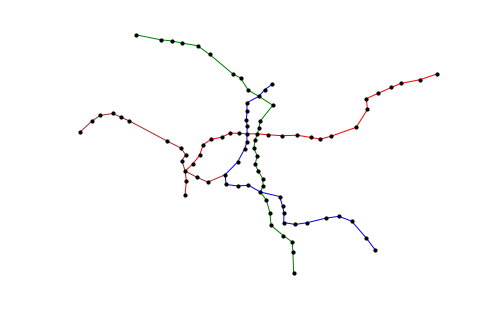

In [5]:
lines = [line1, line2, line3, line10]
lengths = [line1lengths, line2lengths, line3lengths, line10lengths]
line_color = ['blue', 'red', 'green', 'brown']

# add edges and their respective lengths
for k, line in enumerate(lines):
    for i in range(len(line)-1): # looking at sequential pairs so stop early
        a = nid[str.upper(line[i])]
        b = nid[str.upper(line[i+1])]
        G.add_edge(a, b, weight=lengths[k][i])
        G[a][b]['color'] = line_color[k]
        
nx.draw(G, pos=nx.get_node_attributes(G,'pos'), node_size=10, node_color='k', edge_color=[G[u][v]['color'] for u,v in G.edges()])
plt.savefig('network.png',dpi=600)
plt.show()

In [39]:
p=dict(nx.shortest_path_length(G, weight='weight'))

# User ID switched or didn't

Loaded in from a previously created csv from `build_features.ipynb`.

In [94]:
didswitch = pd.read_csv('../switch_or_not.csv')
didswitch = didswitch.loc[didswitch['switched']==1,:]['Card_Id'].unique()
didswitch = set(didswitch) # ids of users who switched

# Convert observed trips to table for pylogit

Take the other outputs from `build_features.ipynb` and construct a csv for use in pylogit.

In [95]:
dfb = pd.read_csv('../ods_b4_20150304.csv')
# header = ['id', 'station1', 'station2', 'fare']
# dfb.columns = header
keepers = dfb['id'].unique()

dfa = pd.read_csv('../ods_af_20150429.csv')
# dfa.columns = header
# dfa = dfa.loc[dfa['id'].isin(keepers),:]

dfa.head()

,fare,id,station1,station2
0,0.0,9.962641e+11,10.0,10.0
1,0.0,9.962601e+11,31.0,31.0
2,0.0,9.962641e+11,42.0,42.0
3,0.0,9.960610e+11,10.0,12.0
4,190.0,9.961640e+11,8.0,9.0


In [104]:
# initialize empty dataframe to output
dfr = pd.DataFrame({'choice':[], # choice of ID
#                     'id':[], # user's card ID # don't need this
                    
                    'full_fare':[], # do they pay the full fare
                    'discounted':[], # do they get a discounted fare
                    'free_fare':[], # do they get free fares
                    
                    'ttime_n':[], # travel time if they stay on current
                    'ttime_3':[], # travel time if they switch to line 3
                    
                    'fare_n':[], # fare if they stay on current
                    'fare_3':[], # fare if they switched to line 3
                    
                    'choice_id':[] # row number
                   })
dfr

,choice,choice_id,discounted,fare_3,fare_n,free_fare,full_fare,id,ttime_3,ttime_n


In [105]:
# determine full fare for each OD pair in dataset and save in a dictionary for future reference
dffull = pd.concat([dfa,dfb], axis=0)
fares = {}
for i,row in dffull.iterrows():
    pair = tuple(np.sort([row['station1'], row['station2']]).tolist())
    if pair in fares: # replace if current fare is bigger
        fares[pair] = np.max([fares[pair], row['fare']])
    else:
        fares[pair] = row['fare']
fares[(26,95)]

190.0

In [108]:
# for each station in the system aside from line 3, find the closest station on line 3 

# don't include transfer stations (since they were already avaialable for use before line 3 opened)
line3nt = ['Linchang','Xinghuolu','SEU Chengxian College','Taifenglu','Tianruncheng','Liuzhoudonglu','Shangyuanmen','Wutangguangchang','Xiaoshi','NFU Xinzhuang','Jimingsi','Fuqiao','Changfujie','Fuzimiao','Wudingmen','Yuhuamen','Kazimen','Daminglu','Mingfaguangchang','Hongyundadao','Shengtaixilu','Tianyuanxilu','Jiulonghu','Chengxindadao','SEU Jiulonghu Campus','Mozhoudonglu']
line3nt = [str.upper(st) for st in line3nt]

# these are the transfer stations on line 3
transfers = ['Nanjing Railway Station','Daxinggong','Nanjing South Railway Station']
transfers = [str.upper(st) for st in transfers]

# for station in lines 1 2 10 that's not a transfer, find closest non-transfer line3 station
closest = {}
# key: station_id of line 1/2/10 station, value: tuple of (dist, station_id of corresponding line3 station)

for station in line1 + line2 + line10:
    if station in transfers: # if station is line 3 transfer station, just give that
        closest[station] = (0, station)
    else:
        min_dist = 1e16 # arbitrarily large
        min_station = [];
        for station3 in line3nt:
            d = vincenty(G.nodes[nid[station]]['pos'], G.nodes[nid[station3]]['pos']).meters
            if d < min_dist:
                min_dist = d
                min_station = station3         
        closest[station] = (min_dist, min_station)

/home/carlin/anaconda3/lib/python3.6/site-packages/geopy/point.py:85: UserWarning: Latitude has been normalized, because its absolute value was more than 90. This is probably not what was meant, because the normalized value is on a different pole. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.  This will cause a ValueError exception in the future versions of geopy.
  UserWarning)


In [109]:
def most_frequent_trip(uid, dat):
    # figure out the set of two stations from [dat] dataframe that the user with id [uid]
    # travels between the most, and also figure out if the passenger's fare is discounted or not
    
    # select for relevant rows in [dat]
    df = dat.loc[dat['id'] == uid,:]
    
    # find most [uid]'s frequent station pair
    pairs = {}
    for i,row in df.iterrows(): # count instances of each station pair used by [uid]
        pair = tuple(np.sort([row['station1'], row['station2']]).tolist())
        if pair in pairs:
            pairs[pair] += 1
        else:
            pairs[pair] = 1
    stations = max(pairs, key=pairs.get) 
    
    # figure out how large the [uid]'s discount is, if any
    true_fare = 0
    for i,row in df.iterrows(): # find an instance of [uid] traveling on their favorite pairing
        pair = tuple(np.sort([row['station1'], row['station2']]).tolist())
        if pair == stations: # this is an instance where they traveled between their favorite pairing
            true_fare = row['fare']
    fare_scale = true_fare/fares[stations]
    
    return stations, true_fare, fare_scale

In [110]:
# build csv for pylogit

v = 0.64 # speed of trains in km/min

for ii,uid in enumerate(keepers):
    row = {}
    
    # figure out their most common OD pair and fare scale from before line 3 opens
    pair_b, true_fare, fare_scale = most_frequent_trip(uid, dfb)
    
    # determine their new OD pair for if they switched to line 3
    dists = np.zeros(2)
    for i,s in enumerate(pair_b):
        if s not in transfers: # s isn't a line 3 transfer station, 
            dists[i] = closest[idn[s]][0]
    station_to_switch = np.argmin(dists)
    pair_new = list(pair_b)
    pair_new[station_to_switch] = nid[closest[idn[pair_new[station_to_switch]]][1]]
    pair_new = tuple(np.sort(pair_new).tolist())
    
    # did they actually switch? # 0 if not switch, 1 if switch 
    if uid in didswitch:
        row['choice'] = 1
    else:
        row['choice'] = 0
    
    # track id
#     row['id'] = uid # not necessary for pylogit
    
    
    # get demographics from fare_scale
    if fare_scale >= 1:
        row['full_fare'] = 1
        row['discounted'] = 0
        row['free_fare'] = 0
    elif fare_scale > 0:
        row['full_fare'] = 0
        row['discounted'] = 1
        row['free_fare'] = 0
    else:
        row['full_fare'] = 0
        row['discounted'] = 0
        row['free_fare'] = 1    
    
    
    # find travel time of not switching
    row['ttime_n'] = p[pair_b[0]][pair_b[1]]/v
    
    # find travel time of switching    
    row['ttime_3'] = p[pair_new[0]][pair_new[1]]/v
    
    
    # give their fare if they keep their current OD
    row['fare_n'] = true_fare
    
    # figure out their fare if they switch to new pair
    if pair_new in fares:
        row['fare_3'] = fares[pair_new]*fare_scale
    else:
        row['fare_3'] = true_fare * row['ttime_3']/row['ttime_n'] # inferred fare
    
    
    # track which row (1-indexed)
    row['choice_id'] = ii+1
    
    
    # result
    dfr.loc[dfr.shape[0]] = row

dfr.head()

/home/carlin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/carlin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars
/home/carlin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in double_scalars


,choice,choice_id,discounted,fare_3,fare_n,free_fare,full_fare,id,ttime_3,ttime_n
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.962641e+11,4.843750,0.0000
1,0.0,2.0,0.0,NaN,0.0,1.0,0.0,9.962601e+11,16.625000,0.0000
2,0.0,3.0,0.0,NaN,0.0,1.0,0.0,9.962641e+11,11.078125,0.0000
3,0.0,4.0,0.0,0.0,0.0,1.0,0.0,9.960610e+11,8.093750,3.2500
4,1.0,5.0,0.0,0.0,0.0,1.0,0.0,9.971667e+11,2.687500,2.6875


In [111]:
dfr.to_csv('for_pylogit.csv', index=False)

In [112]:
# note: need to drop rows with 0 ttime_n as well as any row with a NaN
# add availability columns before using in pylogit
dfr.sample(50)

,choice,choice_id,discounted,fare_3,fare_n,free_fare,full_fare,id,ttime_3,ttime_n
9841,0.0,9842.0,0.0,340.000000,380.0,0.0,1.0,9.965722e+11,29.312500,23.687500
7639,0.0,7640.0,0.0,384.590336,190.0,0.0,1.0,9.907708e+11,30.109375,14.875000
1456,0.0,1457.0,0.0,263.595918,285.0,0.0,1.0,9.960604e+11,17.703125,19.140625
5528,0.0,5529.0,0.0,431.911447,380.0,0.0,1.0,9.961604e+11,32.890625,28.937500
7666,0.0,7667.0,1.0,95.000000,190.0,0.0,0.0,9.963619e+11,11.718750,6.750000
4561,0.0,4562.0,0.0,155.109780,190.0,0.0,1.0,9.962614e+11,6.390625,7.828125
4221,0.0,4222.0,0.0,190.000000,190.0,0.0,1.0,9.706728e+11,15.046875,11.218750
6326,0.0,6327.0,0.0,380.000000,475.0,0.0,1.0,9.700717e+11,26.281250,36.984375
6724,0.0,6725.0,0.0,190.000000,190.0,0.0,1.0,9.962618e+11,15.046875,11.218750
8986,0.0,8987.0,0.0,190.000000,190.0,0.0,1.0,9.962616e+11,6.703125,4.937500


In [ ]:
# helper cell for use in another notebook
# get ids of all line 3 stations that aren't transfer stations
l3ntids = set([nid[n] for n in line3nt])
l3ntids